In [31]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
import matplotlib.pyplot as plt

In [93]:
df= pd.read_csv("D:\heartF.csv", index_col = 0)
df.head()

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,,,,,,,,,,,,
75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.shape

(299, 12)

In [7]:
# the data has 299 observations and 12 columns

In [8]:
df.dtypes

anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [10]:
df.isnull().sum()

anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
#as we can see there is no null values in the datasets

In [12]:
# Plotting a histogram in order to see the distribution of data with repect of time

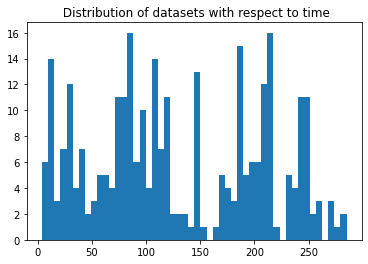

In [19]:
t = df['time']
plt.hist(t, bins=50)
plt.title(" Distribution of datasets with respect to time")
plt.show()

In [20]:
# we are going to plot the whole dataset in order to see how dataset is behaving \
#and for this we are using non-parametric approach called Kaplan-Maier Curve Estimation(KM curve)

Text(0.5, 1.0, 'Survival Plot with 95% Confidence Interval')

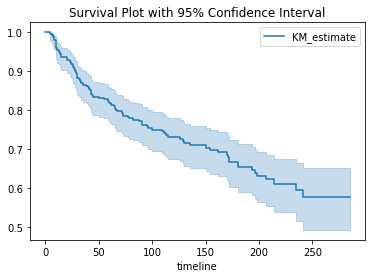

In [24]:
s = df["DEATH_EVENT"]
kmf= KaplanMeierFitter()
kmf.fit(durations = t, event_observed= s)
kmf.plot_survival_function()
plt.title("Survival Plot with 95% Confidence Interval")

In [25]:
#the above plot shows the survival probablity overtime time we can see that the survial probability is decresing as the time is increasing 

In [26]:
# we are going plotting the death probality over time.

Text(0.5, 1.0, 'Death probability with 95% Confidence Interval')

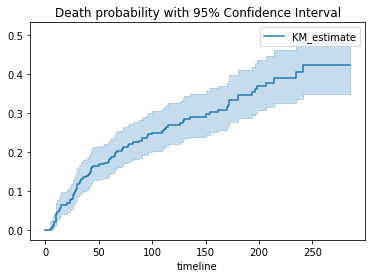

In [28]:
kmf.plot_cumulative_density()
plt.title("Death probability with 95% Confidence Interval")

In [29]:
#MEDIAN SURVIVAL TIME

In [32]:
md = kmf.median_survival_time_
md_CI = median_survival_times(kmf.confidence_interval_)
print(md)
print(md_CI)

inf
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                   241.0                     inf


In [33]:
# KM plot for gender and sex

KeyError: "None of [Index(['At risk', 'Censored', 'Events'], dtype='object')] are in the [index]"

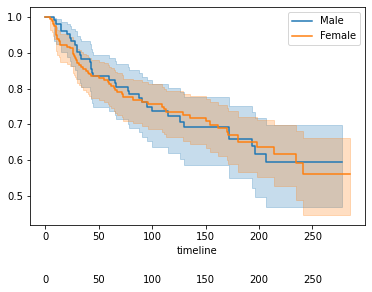

In [37]:
ax = plt.subplot(111)
variable = (df["sex"] == 0)
kmf.fit(durations = t[variable], event_observed = s[variable], label="Male")
kmf.plot_survival_function(ax = ax)
kmf.fit(t[~variable], event_observed = s[~variable], label = "Female")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)
plt.title("Survival of different gender group")

KeyError: "None of [Index(['At risk', 'Censored', 'Events'], dtype='object')] are in the [index]"

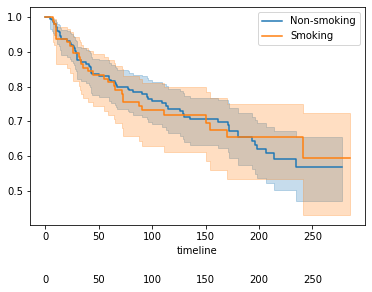

In [39]:
ax = plt.subplot(111)
variable = (df["smoking"] == 0)
kmf.fit(durations = t[variable], event_observed = s[variable], label="Non-smoking")
kmf.plot_survival_function(ax = ax)
kmf.fit(t[~variable], event_observed = s[~variable], label = "Smoking")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)
plt.title("Survival of different smoking group")
print(variable)

In [40]:
#Cox-Proportional Hazard Model(Semi-Parametric)

In [48]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(df, duration_col = 'time', event_col = 'DEATH_EVENT')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -480.59
         time fit was run = 2022-05-03 20:57:12 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
anaemia                    0.50       1.65       0.22             0.08             0.93                 1.08                 2.53
creatinine_phosphokinase   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diabetes                  -0.09       0.92       0.22            -0.52             0.34                 0.60                 1.41
ejection_fraction         -0.05       0.95       0.01            -0.07            -0.03                 0.94                 0.97
high_blood_pressure        0.46       1.59       0.22             0.04             0.89                 1.04                 2.43
platelets                  0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.34       1.40       0.07             0.20             0.47                 1.22                 1.60
serum_sodium              -0.05       0.96       0.02            -0.09             0.00                 0.91                 1.00
sex                       -0.09       0.91       0.25            -0.58             0.40                 0.56                 1.49
smoking                    0.04       1.04       0.25            -0.46             0.54                 0.63                 1.71

                           cmp to     z      p   -log2(p)
covariate                                                
anaemia                      0.00  2.31   0.02       5.57
creatinine_phosphokinase     0.00  2.06   0.04       4.65
diabetes                     0.00 -0.40   0.69       0.53
ejection_fraction            0.00 -4.52 <0.005      17.27
high_blood_pressure          0.00  2.16   0.03       5.01
platelets                    0.00  0.10   0.92       0.11
serum_creatinine             0.00  4.93 <0.005      20.24
serum_sodium                 0.00 -1.94   0.05       4.24
sex                          0.00 -0.36   0.72       0.48
smoking                      0.00  0.16   0.87       0.19
---
Concordance = 0.51
Partial AIC = 981.18
log-likelihood ratio test = 57.23 on 10 df
-log2(p) of ll-ratio test = 26.30

In [56]:
df_new = df.drop('creatinine_phosphokinase', axis=1)

In [62]:
df_new1 =  df_new.drop('platelets', axis=1)

In [99]:
cph = CoxPHFitter()
cph.fit(ab, duration_col = 'time', event_col = 'DEATH_EVENT')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -480.59
         time fit was run = 2022-05-04 14:30:00 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
anaemia                    0.50       1.65       0.22             0.08             0.93                 1.08                 2.53
creatinine_phosphokinase   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diabetes                  -0.09       0.92       0.22            -0.52             0.34                 0.60                 1.41
ejection_fraction         -0.05       0.95       0.01            -0.07            -0.03                 0.94                 0.97
high_blood_pressure        0.46       1.59       0.22             0.04             0.89                 1.04                 2.43
platelets                  0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.34       1.40       0.07             0.20             0.47                 1.22                 1.60
serum_sodium              -0.05       0.96       0.02            -0.09             0.00                 0.91                 1.00
sex                       -0.09       0.91       0.25            -0.58             0.40                 0.56                 1.49
smoking                    0.04       1.04       0.25            -0.46             0.54                 0.63                 1.71

                           cmp to     z      p   -log2(p)
covariate                                                
anaemia                      0.00  2.31   0.02       5.57
creatinine_phosphokinase     0.00  2.06   0.04       4.65
diabetes                     0.00 -0.40   0.69       0.53
ejection_fraction            0.00 -4.52 <0.005      17.27
high_blood_pressure          0.00  2.16   0.03       5.01
platelets                    0.00  0.10   0.92       0.11
serum_creatinine             0.00  4.93 <0.005      20.24
serum_sodium                 0.00 -1.94   0.05       4.24
sex                          0.00 -0.36   0.72       0.48
smoking                      0.00  0.16   0.87       0.19
---
Concordance = 0.70
Partial AIC = 981.18
log-likelihood ratio test = 57.23 on 10 df
-log2(p) of ll-ratio test = 26.30

In [64]:
#Plotting the coefficeints

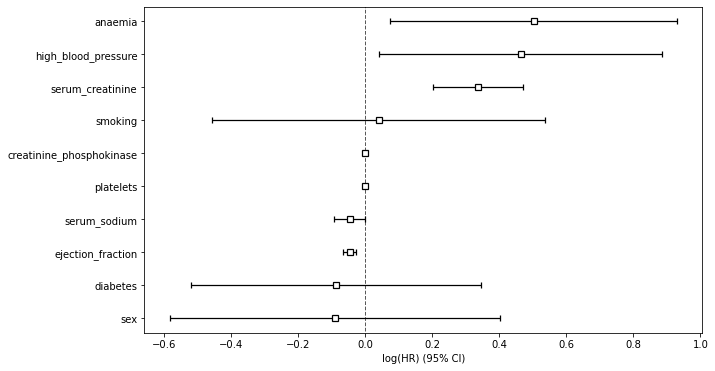

In [100]:
plt.subplots(figsize = (10,6))
cph.plot()

In [66]:
#Plotting the partial effects on Outcome (Cox-PH Regression)

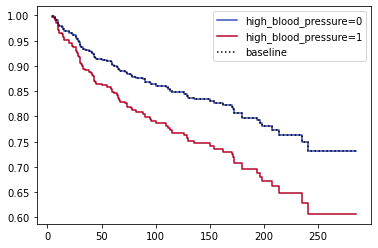

In [68]:
cph.plot_partial_effects_on_outcome(covariates = 'high_blood_pressure', values=[0,1], cmap= 'coolwarm')

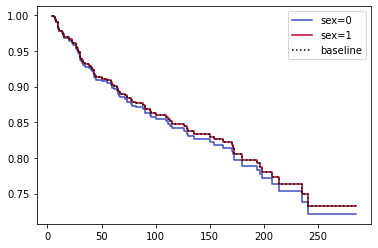

In [69]:
cph.plot_partial_effects_on_outcome(covariates = 'sex', values=[0,1], cmap= 'coolwarm')

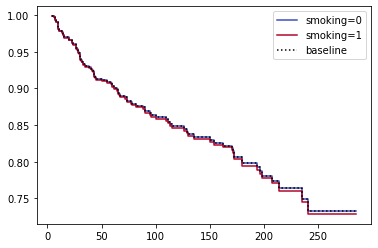

In [70]:
cph.plot_partial_effects_on_outcome(covariates = 'smoking', values=[0,1], cmap= 'coolwarm')

In [71]:
# Checking proportional hazard assumptions

In [96]:
ab = df.reset_index(drop=True)

In [101]:
cph.check_assumptions(ab, p_value_threshold = 0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
         test_name = proportional_hazard_test

---
                               test_statistic    p  -log2(p)
anaemia                  km              0.03 0.86      0.22
                         rank            0.09 0.76      0.39
creatinine_phosphokinase km              0.64 0.42      1.24
                         rank            0.60 0.44      1.19
diabetes                 km              0.01 0.92      0.12
                         rank            0.00 0.96      0.07
ejection_fraction        km              6.84 0.01      6.81
                         rank            7.11 0.01      7.03
high_blood_pressure      km              0.57 0.45      1.15
                         rank            0.57 0.45      1.15
platelets                km              0.00 0.95      0.08
                         rank            0.06 0.81      0.30
serum_creatinine         km              2.54 0.11      3.18
                         rank            2.69 0.10      3.31
serum_sodium             km              1.82 0.18      2.50
                         rank            2.57 0.11      3.20
sex                      km              0.43 0.51      0.97
                         rank            0.74 0.39      1.36
smoking                  km              0.73 0.39      1.35
                         rank            0.41 0.52      0.94



1. Variable 'ejection_fraction' failed the non-proportional test: p-value is 0.0077.

   Advice 1: the functional form of the variable 'ejection_fraction' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'ejection_fraction' using pd.cut, and then specify it in
`strata=['ejection_fraction', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Prop

[]

In [102]:
# Using proportional hazard test to check assumptions

In [103]:
from lifelines.statistics import proportional_hazard_test
results = proportional_hazard_test(cph, ab, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
         test_name = proportional_hazard_test

---
                          test_statistic    p  -log2(p)
anaemia                             0.09 0.76      0.39
creatinine_phosphokinase            0.60 0.44      1.19
diabetes                            0.00 0.96      0.07
ejection_fraction                   7.11 0.01      7.03
high_blood_pressure                 0.57 0.45      1.15
platelets                           0.06 0.81      0.30
serum_creatinine                    2.69 0.10      3.31
serum_sodium                        2.57 0.11      3.20
sex                                 0.74 0.39      1.36
smoking                             0.41 0.52      0.94

In [104]:
#WE can see that only ejection_fraction has violated the proportional hazard assumption

In [105]:
# Final steo choosing the best fitted Distribution
# the distribution which has lowest AIC vlaue considers to be the best fitted model

In [113]:
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter
# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()

model_li = [wb, ex, log, loglogis] 
# Fitin to data
for model in model_li:
    model.fit(durations = ab["time"], event_observed = ab["DEATH_EVENT"])
# Print AIC
    print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

The AIC value for WeibullFitter is 1344.8757115822702
The AIC value for ExponentialFitter is 1347.081826041116
The AIC value for LogNormalFitter is 1336.54616750603
The AIC value for LogLogisticFitter is 1342.3339662530461


In [114]:
# We can see that LogNormalFitter has lowest AIC value and hence considered to be the best model

In [115]:
#Fitting LogNormal Model

In [126]:
from lifelines import LogNormalAFTFitter
logN_aft = LogNormalAFTFitter()
logN_aft.fit( ab, duration_col='time', event_col='DEATH_EVENT')
logN_aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
   number of observations = 299
number of events observed = 96
           log-likelihood = -641.55
         time fit was run = 2022-05-04 15:02:09 UTC

---
                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                        
mu_    anaemia                   -0.58       0.56       0.26            -1.10            -0.07                 0.33                 0.94
       creatinine_phosphokinase  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       diabetes                   0.04       1.04       0.26            -0.47             0.56                 0.62                 1.75
       ejection_fraction          0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       high_blood_pressure       -0.60       0.55       0.26            -1.12            -0.08                 0.33                 0.92
       platelets                  0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       serum_creatinine          -0.42       0.66       0.11            -0.63            -0.21                 0.53                 0.81
       serum_sodium               0.07       1.07       0.03             0.01             0.12                 1.01                 1.13
       sex                        0.03       1.03       0.31            -0.57             0.63                 0.57                 1.88
       smoking                   -0.08       0.93       0.30            -0.67             0.52                 0.51                 1.67
       Intercept                 -3.43       0.03       3.82           -10.92             4.06                 0.00                57.83
sigma_ Intercept                  0.54       1.72       0.08             0.38             0.70                 1.47                 2.02

                                  cmp to     z      p   -log2(p)
param  covariate                                                
mu_    anaemia                      0.00 -2.21   0.03       5.22
       creatinine_phosphokinase     0.00 -1.69   0.09       3.46
       diabetes                     0.00  0.17   0.87       0.21
       ejection_fraction            0.00  3.31 <0.005      10.09
       high_blood_pressure          0.00 -2.28   0.02       5.46
       platelets                    0.00  0.39   0.70       0.52
       serum_creatinine             0.00 -3.84 <0.005      13.01
       serum_sodium                 0.00  2.31   0.02       5.57
       sex                          0.00  0.10   0.92       0.12
       smoking                      0.00 -0.25   0.80       0.32
       Intercept                    0.00 -0.90   0.37       1.44
sigma_ Intercept                    0.00  6.72 <0.005      35.64
---
Concordance = 0.71
AIC = 1307.10
log-likelihood ratio test = 49.44 on 10 df
-log2(p) of ll-ratio test = 21.50

In [128]:
# WE can see the variable "creatinine" and paltelets have 0 cofficient so we can drop them.


In [132]:
df_new =  df.drop('platelets', axis=1)
df_new1 = df_new.drop('creatinine_phosphokinase', axis=1)
df_new1.head()

,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,,,,,,,,,,
75.0,0,0,20,1,1.9,130,1,0,4,1
55.0,0,0,38,0,1.1,136,1,0,6,1
65.0,0,0,20,0,1.3,129,1,1,7,1
50.0,1,0,20,0,1.9,137,1,0,7,1
65.0,1,1,20,0,2.7,116,0,0,8,1


In [137]:

logN_aft = LogNormalAFTFitter()
logN_aft.fit( dfT, duration_col='time', event_col='DEATH_EVENT')
logN_aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 47 total observations, 19 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
   number of observations = 47
number of events observed = 28
           log-likelihood = -149.01
         time fit was run = 2022-05-04 15:13:17 UTC

---
                             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                   
mu_    anaemia              -1.08       0.34       0.51            -2.08            -0.08                 0.13                 0.93
       diabetes              1.30       3.67       0.50             0.31             2.29                 1.36                 9.86
       ejection_fraction     0.04       1.04       0.02            -0.00             0.07                 1.00                 1.08
       high_blood_pressure  -0.27       0.77       0.47            -1.18             0.65                 0.31                 1.91
       serum_creatinine     -0.05       0.95       0.13            -0.29             0.20                 0.75                 1.22
       serum_sodium          0.16       1.17       0.05             0.05             0.26                 1.06                 1.30
       sex                  -0.62       0.54       0.56            -1.71             0.47                 0.18                 1.60
       smoking               0.31       1.37       0.54            -0.74             1.37                 0.48                 3.92
       Intercept           -17.82       0.00       7.23           -31.99            -3.65                 0.00                 0.03
sigma_ Intercept             0.29       1.34       0.14             0.01             0.57                 1.01                 1.77

                             cmp to     z      p   -log2(p)
param  covariate                                           
mu_    anaemia                 0.00 -2.11   0.03       4.85
       diabetes                0.00  2.57   0.01       6.63
       ejection_fraction       0.00  1.83   0.07       3.91
       high_blood_pressure     0.00 -0.57   0.57       0.81
       serum_creatinine        0.00 -0.39   0.70       0.52
       serum_sodium            0.00  2.97 <0.005       8.41
       sex                     0.00 -1.12   0.26       1.93
       smoking                 0.00  0.58   0.56       0.84
       Intercept               0.00 -2.47   0.01       6.19
sigma_ Intercept               0.00  2.02   0.04       4.54
---
Concordance = 0.73
AIC = 318.02
log-likelihood ratio test = 16.42 on 8 df
-log2(p) of ll-ratio test = 4.77

In [138]:
#calculating mean median surviaval time

In [141]:
print("LogNormalaftFitter median survival time : ",logN_aft.median_survival_time_)
print("LogNormalaftFitter mean survival time : ",logN_aft.mean_survival_time_)

LogNormalaftFitter median survival time :  27.187913910199903
LogNormalaftFitter mean survival time :  66.28391971747246


In [142]:
# plotting the cofficients

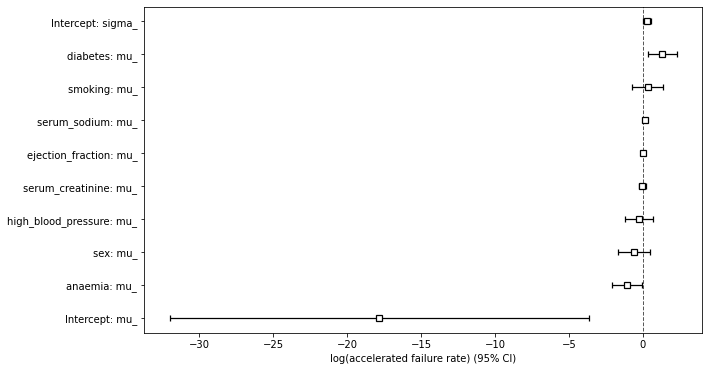

In [144]:
plt.subplots(figsize=(10, 6))
logN_aft.plot()

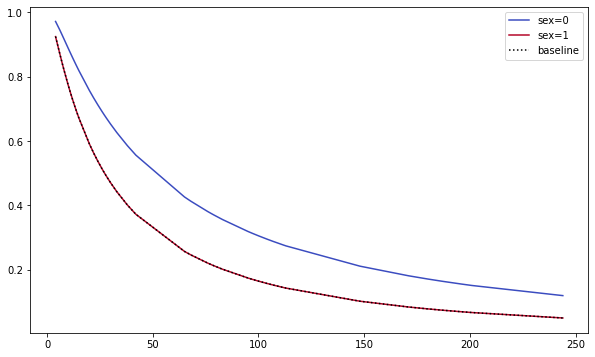

In [154]:
plt.subplots(figsize=(10, 6))
logN_aft.plot_partial_effects_on_outcome('sex', values=[0,1], cmap='coolwarm')

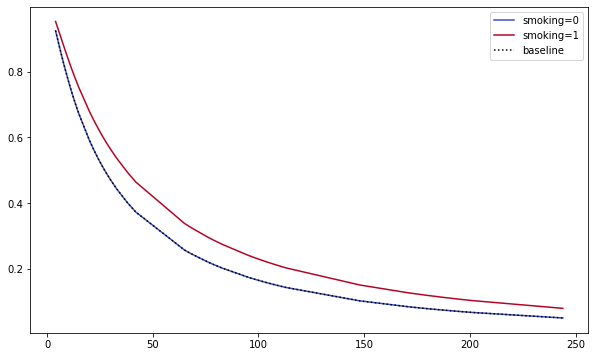

In [159]:
plt.subplots(figsize=(10, 6))
logN_aft.plot_partial_effects_on_outcome('smoking', values=[0,1], cmap='coolwarm')

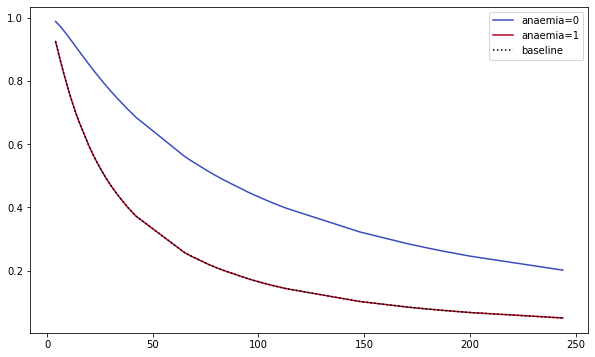

In [161]:
plt.subplots(figsize=(10, 6))
logN_aft.plot_partial_effects_on_outcome('anaemia', values=[0,1], cmap='coolwarm')

In [162]:
#we can see that female patients has higher survival probabilities at any given instance of time 
#compared to  male patients. Similaary, the patient who has anaemia has higher probability of dying than the patients without anaemia
#whereas the smokers seems to have higher probabilities of survivaing than non-smokers.